<a href="https://colab.research.google.com/github/ValdazoAmerico/keras-logistic-regression/blob/main/keras_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import one_hot

text = "The quick brown fox jumped over the lazy dog."


In [2]:
words = set(text_to_word_sequence(text))
words

{'brown', 'dog', 'fox', 'jumped', 'lazy', 'over', 'quick', 'the'}

In [3]:
vocab_size = len(words)
vocab_size

8

In [4]:
result = one_hot(text, round(vocab_size*1.3))

In [5]:
result

[2, 2, 9, 6, 2, 2, 2, 8, 2]

In [6]:
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import hashing_trick
text = "The quick brown fox jumped over the lazy dog."
words = set(text_to_word_sequence(text))
vocab_size = len(words)
result = hashing_trick(text, round(vocab_size*1.3), hash_function='md5')
result

[6, 4, 1, 2, 7, 5, 6, 2, 6]

In [7]:
from keras.preprocessing.text import Tokenizer

docs =  ['Well done!',
         'Good work',
         'Great effort',
         'nice work',
         'Excellent!']
t = Tokenizer()

t.fit_on_texts(docs)

In [8]:
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)

OrderedDict([('well', 1), ('done', 1), ('good', 1), ('work', 2), ('great', 1), ('effort', 1), ('nice', 1), ('excellent', 1)])
5
{'work': 1, 'well': 2, 'done': 3, 'good': 4, 'great': 5, 'effort': 6, 'nice': 7, 'excellent': 8}
defaultdict(<class 'int'>, {'done': 1, 'well': 1, 'work': 2, 'good': 1, 'great': 1, 'effort': 1, 'nice': 1, 'excellent': 1})


In [9]:
encoded_docs = t.texts_to_matrix(docs, mode='count')
print(encoded_docs)

[[0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [43]:
import numpy as np
import pandas as pd

df = pd.read_csv('SMSSpamCollection.tsv', sep='\t')
len(df)

5571

In [44]:
df.columns = ['label', 'message']

In [45]:
df['length'] = df['message'].apply(len)
df.head()

,label,message,length
0,ham,Ok lar... Joking wif u oni...,29
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,ham,U dun say so early hor... U c already then say...,49
3,ham,"Nah I don't think he goes to usf, he lives aro...",61
4,spam,FreeMsg Hey there darling it's been 3 week's n...,147


In [46]:

def punct2(txt):
  return count(txt,set(string.punctuation))

In [47]:
df['punct'] = df['message'].apply(punct2)
df.head()

,label,message,length,punct
0,ham,Ok lar... Joking wif u oni...,29,6
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
2,ham,U dun say so early hor... U c already then say...,49,6
3,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
4,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8


In [15]:
import string
count = lambda l1,l2: sum([1 for x in l1 if x in l2])

s = 'abcd!!!'

count(s,set(string.punctuation))                                                                                                      


3

In [17]:
len(df)

5571

In [18]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [19]:
df['message'].unique()

array(['Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       'U dun say so early hor... U c already then say...', ...,
       'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [20]:
df['label'].value_counts()

ham     4824
spam     747
Name: label, dtype: int64

In [21]:
df['length'].describe()

count    5571.000000
mean       80.484473
std        59.946894
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

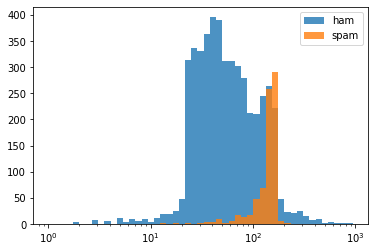

In [22]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label'] == "ham"]['length'], bins=bins, alpha=0.8)
plt.hist(df[df['label'] == "spam"]['length'], bins=bins, alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [23]:
df['punct'].describe()


count    5571.000000
mean        4.176629
std         4.623882
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

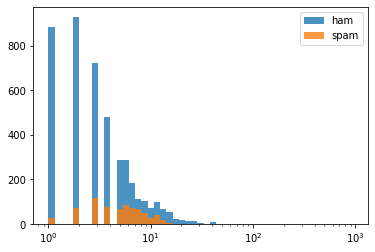

In [24]:
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label'] == "ham"]['punct'], bins=bins, alpha=0.8)
plt.hist(df[df['label'] == "spam"]['punct'], bins=bins, alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [25]:
X = df[['length','punct']]
y = df['label']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)


In [27]:
X_train.shape

(3899, 2)

In [28]:
X_test.shape

(1672, 2)

In [29]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver="lbfgs")
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
 from sklearn import metrics
 predictions = lr_model.predict(X_test)
 print(metrics.confusion_matrix(y_test,predictions))

[[1407   46]
 [ 209   10]]


In [33]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1407,46
spam,209,10


In [39]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.92      1453
        spam       0.18      0.05      0.07       219

    accuracy                           0.85      1672
   macro avg       0.52      0.51      0.49      1672
weighted avg       0.78      0.85      0.81      1672



In [40]:
print(metrics.accuracy_score(y_test,predictions))

0.847488038277512


In [42]:
df

,ham,spam
ham,1407,46
spam,209,10


In [48]:
X = df['message']
y = df['label']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [50]:
X_train.shape

(3899,)

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

In [52]:
X_train_counts.shape

(3899, 7291)

In [53]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [54]:
X_train_tfidf

<3899x7291 sparse matrix of type '<class 'numpy.float64'>'
	with 51850 stored elements in Compressed Sparse Row format>

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)

In [61]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver="lbfgs")
clf.fit(X_train_tfidf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression()),])
text_clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling

In [64]:
predictions = text_clf.predict(X_test)

In [65]:
predictions

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'spam'], dtype=object)

In [67]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[1450    3]
 [  47  172]]


In [68]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1453
        spam       0.98      0.79      0.87       219

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672



In [69]:
print(metrics.accuracy_score(y_test,predictions))

0.9700956937799043
